# How to Do Linear Regression

https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial

## Jupyter Tricks

https://forums.fast.ai/t/jupyter-notebook-enhancements-tips-and-tricks/17064/2

https://forums.fast.ai/t/jupyter-notebook-enhancements-tips-and-tricks/17064

## Seaborn Dataviz Examples

http://seaborn.pydata.org/tutorial.html

http://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

http://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms

http://seaborn.pydata.org/api.html

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

## sklearn has lots of datasets...

In [3]:
from sklearn import datasets

[f for f in datasets.__dict__ if f.startswith('load')]

['load_breast_cancer',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_images',
 'load_sample_image',
 'load_wine',
 'load_svmlight_file',
 'load_svmlight_files']

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
type(diabetes.data)
type(diabetes.target)

numpy.ndarray

numpy.ndarray

# Read in Data

In [6]:
df = pd.read_csv('data/student-mat.csv', sep=';')

In [7]:
df.head()
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [8]:
df.shape

(395, 33)

In [9]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

In [13]:
df.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [11]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Data Viz

An interactive alternative:

https://github.com/altair-viz/altairhttps://github.com/altair-viz/altair

In [12]:
import seaborn as sns

In [ ]:
sns.displot(df, x="flipper_length_mm", binwidth=3)

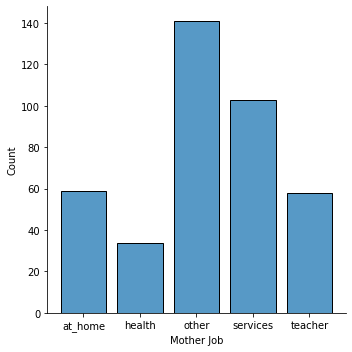

In [27]:
# Categorical
ax = sns.displot(df, x="Mjob", shrink=0.8)

_ = ax.set(xlabel='Mother Job', ylabel='Count')
plt.show()

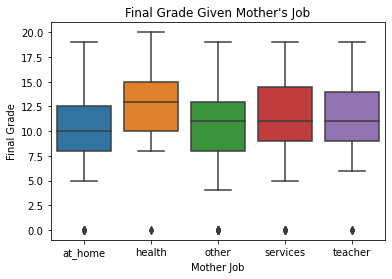

In [36]:
ax = sns.boxplot(x='Mjob', y='G3', data=df)
_ = ax.set(xlabel='Mother Job', ylabel='Final Grade', title='Final Grade Given Mother\'s Job')
plt.show()

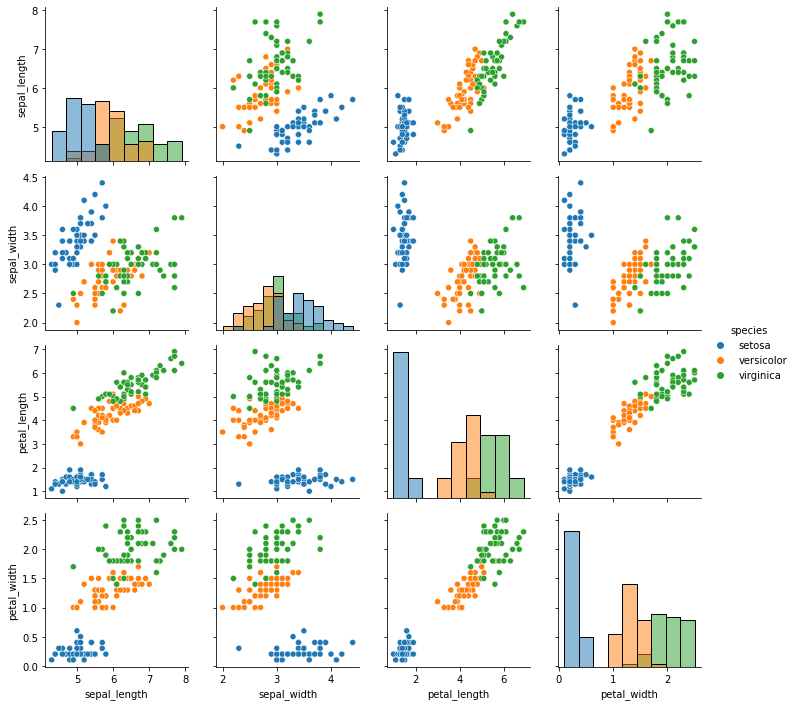

In [28]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris, hue="species")
_ = g.map_diag(sns.histplot)
_ = g.map_offdiag(sns.scatterplot)
_ = g.add_legend()

## (todo) get all numeric/categorical fields

# Linear Regression

In [38]:
df.drop(['G1','G2','G3'], axis=1).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [83]:
from sklearn.model_selection import train_test_split

data = df.drop(['G1', 'G2', 'G3'], axis=1)
target = df[['G1', 'G2', 'G3']]

data.head()
target.head()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


## Run the Model

In [ ]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)  # Error! Cant regress with string input columns

# Why and How we One-Hot Encode:

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [57]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['school']]).toarray())
# merge with main df bridge_df on key values
data = data.join(enc_df)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,0,1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,1.0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,1.0,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,1.0,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,1.0,0.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,0.0,1.0
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,0.0,1.0
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,0.0,1.0
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,0.0,1.0


In [60]:
# generate binary values using get_dummies
pd.get_dummies(data, columns=["Mjob"], prefix=["Mjob_"] )

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,Walc,health,absences,0,1,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher
0,GP,F,18,U,GT3,A,4,4,teacher,course,...,1,3,6,1.0,0.0,1,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,other,course,...,1,3,4,1.0,0.0,1,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,other,other,...,3,3,10,1.0,0.0,1,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,services,home,...,1,5,2,1.0,0.0,0,1,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,home,...,2,5,4,1.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,course,...,5,4,11,0.0,1.0,0,0,0,1,0
391,MS,M,17,U,LE3,T,3,1,services,course,...,4,2,3,0.0,1.0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,other,course,...,3,3,3,0.0,1.0,0,0,1,0,0
393,MS,M,18,R,LE3,T,3,2,other,course,...,4,5,0,0.0,1.0,0,0,0,1,0


### Repeat for all Nominal and Binary Columns

In [94]:
nominal_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 
    'reason', 'guardian', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
]
data.loc[:,nominal_cols].head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,1,1,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,1,1,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,4,2,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,3,3,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [96]:
# Columns NOT being 1-hot encoded:
data.drop(nominal_cols, axis=1).head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,2,2,0,4,3,4,1,1,3,6
1,17,1,2,0,5,3,3,1,1,3,4
2,15,1,2,3,4,3,2,2,3,3,10
3,15,1,3,0,3,2,2,1,1,5,2
4,16,1,2,0,4,3,2,1,2,5,4


In [97]:
data = pd.get_dummies(data, columns = nominal_cols, prefix = [col + '_' for col in nominal_cols])
data.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities__no,activities__yes,nursery__no,nursery__yes,higher__no,higher__yes,internet__no,internet__yes,romantic__no,romantic__yes
0,18,2,2,0,4,3,4,1,1,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,2,0,5,3,3,1,1,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,2,3,4,3,2,2,3,3,...,1,0,0,1,0,1,0,1,1,0
3,15,1,3,0,3,2,2,1,1,5,...,0,1,0,1,0,1,0,1,0,1
4,16,1,2,0,4,3,2,1,2,5,...,1,0,0,1,0,1,1,0,1,0


# Run the Model (for real)

In [131]:
data = df.drop(['G1', 'G2', 'G3'], axis=1)
target_G3 = df[['G3']]

# Same 1-hot encoding step as above
nominal_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 
    'reason', 'guardian', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
]
data = pd.get_dummies(data, columns = nominal_cols, prefix = [col + '_' for col in nominal_cols])

X_train, X_test, y_train, y_test = train_test_split(data, target_G3, test_size=0.2, random_state=0)

# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

LinearRegression()

0.12641847864777966

In [108]:
# Beta
model.coef_
# Intercept
model.intercept_

array([[-5.61350394e-01, -4.65675674e-01,  9.54924596e-01,
        -1.51801020e+00,  1.09387746e-01,  1.52806416e-01,
        -5.07720584e-01, -2.14217981e-01,  2.71001313e-01,
        -1.56413523e-01,  8.82093912e-02, -8.64859884e-01,
         8.64859884e-01, -7.10516795e-01,  7.10516795e-01,
        -3.89279356e-01,  3.89279356e-01, -2.83898290e-01,
         2.83898290e-01,  5.02372310e-02, -5.02372310e-02,
         5.62963808e+00, -1.88897174e+00, -1.76303910e+00,
        -1.65430883e+00, -3.23318405e-01,  1.66533454e-16,
         5.77618447e-01, -3.28706985e-01, -3.70984737e-01,
         1.22073276e-01, -3.42698191e-01,  1.24074312e+00,
        -8.42821640e-02,  6.99496975e-01, -1.51325974e+00,
         1.98970146e-01,  1.47600736e-01, -9.26218262e-01,
        -1.52153508e-01,  7.31800887e-01, -1.53621125e-01,
        -3.20735343e-01,  5.32490457e-01, -5.81339883e-02,
        -1.86863123e-01,  5.77538815e-02,  1.29109241e-01,
         4.24017732e-01, -4.24017732e-01,  3.68690509e-0

array([20.64337933])

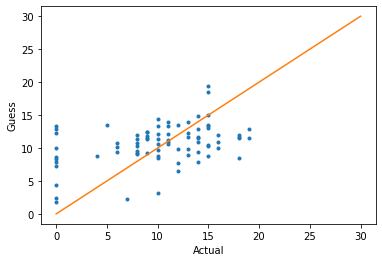

In [115]:
# plot prediction and actual data
y_pred = model.predict(X_test)

_ = plt.plot(y_test, y_pred, '.')
_ = plt.ylabel('Guess')
_ = plt.xlabel('Actual')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 30, 100)
y = x
_ = plt.plot(x, y)
plt.show()

# Model Performance:

In [122]:
#print(f"lr.coef_: {model.coef_}")
#print(f"lr.intercept_: {model.intercept_}")
print(f"Training set score: {round(model.score(X_train, y_train), 2)}")
print(f"Test set score: {round(model.score(X_test, y_test), 7)}")

Training set score: 0.31
Test set score: 0.1264185


# Improving the Model

https://stackoverflow.com/a/47588521/5289570

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
model = RandomForestRegressor(n_estimators=500)

X_train, X_test, y_train, y_test = train_test_split(data, target_G3, test_size=0.2)

model.fit(X_train, y_train.values.ravel())

model.score(X_test, y_test.values.ravel())

RandomForestRegressor(n_estimators=500)

0.318140329528105

In [157]:
y_train.ravel?

Object `y_train.ravel` not found.


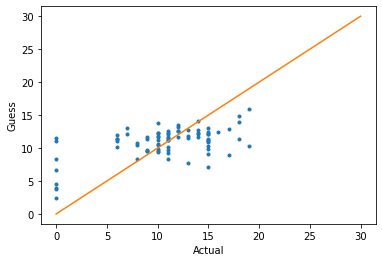

In [160]:
y_pred = model.predict(X_test)

_ = plt.plot(y_test, y_pred, '.')
_ = plt.ylabel('Guess')
_ = plt.xlabel('Actual')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 30, 100)
y = x
_ = plt.plot(x, y)
plt.show()

In [161]:
print(f"Training set score: {round(model.score(X_train, y_train), 2)}")
print(f"Test set score: {round(model.score(X_test, y_test), 7)}")

Training set score: 0.9
Test set score: 0.3181403


# Conclusions

Training accuracy rapidly increased with random forest. Test accuracy still low. Will try regularization?